In [1]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('/content/INR=X.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
X_train = []
y_train = []

# Assuming training_set_scaled is a 2D array with shape (n, 1)
n = training_set_scaled.shape[0]

# Check if you have enough data points to create a window of size 60
if n < 60:
    raise ValueError("Not enough data points to create a window of size 60.")

for i in range(60, n):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Check the shape of X_train and y_train
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (202, 60)
y_train shape: (202,)


In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
import tensorflow as tf


In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [11]:
# Initialising the RNN
regressor = Sequential()


In [12]:

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [13]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [14]:
regressor.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [16]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [19]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
7/7 [==============================] - 46s 164ms/step - loss: 0.0727
Epoch 2/100
7/7 [==============================] - 1s 163ms/step - loss: 0.0344
Epoch 3/100
7/7 [==============================] - 1s 161ms/step - loss: 0.0347
Epoch 4/100
7/7 [==============================] - 1s 163ms/step - loss: 0.0289
Epoch 5/100
7/7 [==============================] - 1s 167ms/step - loss: 0.0274
Epoch 6/100
7/7 [==============================] - 1s 179ms/step - loss: 0.0286
Epoch 7/100
7/7 [==============================] - 2s 280ms/step - loss: 0.0255
Epoch 8/100
7/7 [==============================] - 1s 198ms/step - loss: 0.0265
Epoch 9/100
7/7 [==============================] - 1s 165ms/step - loss: 0.0265
Epoch 10/100
7/7 [==============================] - 1s 164ms/step - loss: 0.0290
Epoch 11/100
7/7 [==============================] - 1s 166ms/step - loss: 0.0281
Epoch 12/100
7/7 [==============================] - 1s 166ms/step - loss: 0.0284
Epoch 13/100
7/7 [==================

In [21]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/INR=X.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [22]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 8s 8s/step


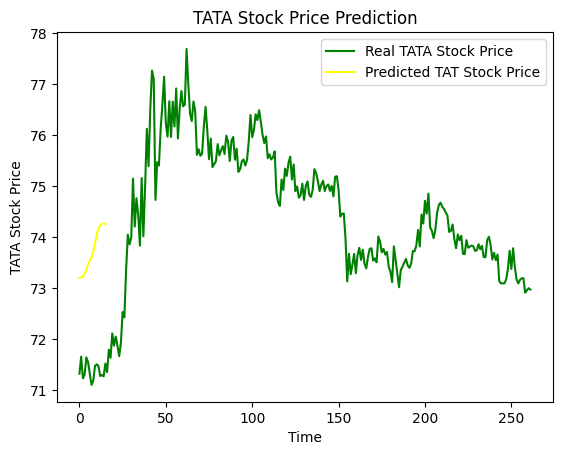

In [23]:
plt.plot(real_stock_price, color = 'green', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'yellow', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()